As a person interested in travelling in Europe, I want to know which countries may have similar characteristics for my own safety. For example, I would be more cautious when travelling to countries that are grouped together because they have a higher crime rate and their citizens have a low confidence rating in the legal system. Hence, I would like to group similar countries together via k-means clustering.

Note that according to the UN, there are 44 countries in Europe. 
Source: https://www.worldometers.info/geography/how-many-countries-in-europe/
However, this dataset contains 32 countries, so 12 European countries will be excluded from any generalizations made from the data.

This notebook will be structured as follows:
1. Importing Libraries and Data Preparation
2. Determining Optimal Number of Clusters
3. Implementing K-Means Clustering
4. Summarizing Results
5. Examining Relevance of Results

We begin by importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Below I will import the datasets with metrics that I personally consider to be important when it comes to travelling. This includes crime, pollution, trust in the legal/police/political system, GDP, perceived health, and population.

In [2]:
df1=pd.read_csv("../input/europe-datasets/crime_2016.csv")
df2=pd.read_csv("../input/europe-datasets/pollution_2016.csv")
df3=pd.read_csv("../input/europe-datasets/trust_in_legal_2013.csv")
df4=pd.read_csv("../input/europe-datasets/trust_in_police_2013.csv")
df5=pd.read_csv("../input/europe-datasets/trust_in_politics_2013.csv")
df6=pd.read_csv("../input/europe-datasets/gdp_2016.csv")
df7=pd.read_csv("../input/europe-datasets/perceived_health_2016.csv")
df8=pd.read_csv("../input/europe-datasets/population_2011.csv")

Combine the data and prep the data for clustering.

In [3]:
# consolidate data with the country as the unique identifier
data=reduce(lambda x,y: pd.merge(x,y, on='country', how='inner'), 
            [df1, df2, df3, df4, df5, df6, df7, df8])

# matrix without the unique identifier for fitting later
x=data
x=x.drop('country',1)

Next, let's decide the number of clusters to be used. Since there are 32 countries we know that the number of clusters should be smaller. We will use 2 methods: the Elbow Method and Average Silhouette Method.

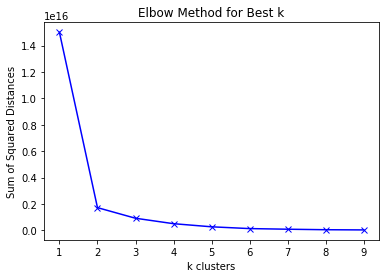

In [4]:
# Elbow Method
sum_of_sq_dist=[] # initialize
K=range(1,10) # check up to 10 clusters
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(x)
    sum_of_sq_dist.append(km.inertia_)

# plot the result
plt.plot(K,sum_of_sq_dist,'bx-')
plt.xlabel('k clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Best k')
plt.show()

The best pick should be where the "Elbow" is in the graph. Looks like 2 clusters might be a good choice. Let's look at the average silhouette method. We want the number of clusters corresponding to the highest silhouette score.

In [5]:
# Print results from Avg Silhouette Method
for n_clusters in range(2,11): # check up to 10 clusters
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) # seed 10
    cluster_labels=clusterer.fit_predict(x)
    silhouette_avg=silhouette_score(x,cluster_labels)
    print("When we use",n_clusters,"clusters,",
          "the average silhouette score is",
          round(silhouette_avg,3)) # round to 3 decimals for readable comparison
    sample_silhouette_values=silhouette_samples(x,cluster_labels)

When we use 2 clusters, the average silhouette score is 0.838
When we use 3 clusters, the average silhouette score is 0.786
When we use 4 clusters, the average silhouette score is 0.59
When we use 5 clusters, the average silhouette score is 0.587
When we use 6 clusters, the average silhouette score is 0.621
When we use 7 clusters, the average silhouette score is 0.629
When we use 8 clusters, the average silhouette score is 0.598
When we use 9 clusters, the average silhouette score is 0.609
When we use 10 clusters, the average silhouette score is 0.577


Evidently, the higest silhouette score is achieved at 2 clusters, which agrees with our value obtained from the Elbow Method. So, we will use 2 clusters for the k-means clustering.

In [6]:
# Fit with k-means clustering
kmeans=KMeans(n_clusters=2)
kmeans=kmeans.fit(x)

col=list(x.columns.values) # original variables
count=data.iloc[:,0] # original countries

ctr=kmeans.cluster_centers_ # cluster coordinates
count_label=kmeans.labels_+1 # assign cluster numbers as cluster 1 and 2 for intuition

# Show results
ctr=pd.DataFrame(ctr,columns=col)
ctr.insert(0,"cluster",[1,2]) # label countries
(ctr.T).round(2)

,0,1
cluster,1.00,2.00
prct_rpt_crime,10.08,12.72
prct_rpt_pollution,12.66,13.82
legal_trust_rating,5.07,4.37
police_trust_rating,6.18,5.80
political_trust_rating,4.21,3.20
gdp,218148.08,1837802.52
prct_health_verygood,23.96,18.78
prct_health_good,43.40,48.30
prct_health_fair,23.11,24.00


We compare the characteristics of cluster 1 and cluster 2. 
Notice that cluster 1 pertains to a lower reported crime rate (inferred as % criminal incidents/population), lower reported pollution, as well as stronger trust in the legal, police, and political systems. They also have overall more people in better health and greater percentage of younger adults. 

However, countries falling in cluster 2 have a better GDP and higher population. It is notable that the actual difference in the centroids (centers) of the 2 clusters is not that large. Variables such as the crime rate in cluster 2 is only a few percent below cluster 1.

In [7]:
# show the clustered countries
ctry_sum={'country': count,
          'cluster': count_label} 
ctry_sum=pd.DataFrame(ctry_sum,columns=['country','cluster'])
ctry_sum

,country,cluster
0,Austria,1
1,Belgium,1
2,Bulgaria,1
3,Switzerland,1
4,Cyprus,1
5,Czechia,1
6,Germany,2
7,Denmark,1
8,Estonia,1
9,Greece,1


We find that Germany, Spain, France, Italy, Poland, and the UK fall under cluster 2, which suggests that perhaps we could be more alert towards aspects like crime when travelling to these countries.

Let's visualize the results by plotting the clustered data points.

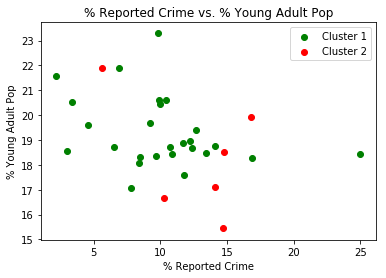

In [8]:
result = pd.concat([ctry_sum.reset_index(drop=True), x], axis=1) # original data and cluster results
cluster_1=result[result.cluster==1]
cluster_2=result[result.cluster==2]
plt.scatter(cluster_1.iloc[:,2],cluster_1.iloc[:,14],c="green",label="Cluster 1")
plt.scatter(cluster_2.iloc[:,2],cluster_2.iloc[:,14],c="red",label="Cluster 2")
plt.xlabel('% Reported Crime')
plt.ylabel('% Young Adult Pop')
plt.title('% Reported Crime vs. % Young Adult Pop')
plt.legend()
plt.show()

Our original comparison led us to infer that crime tends to be higher in cluster 2. However, this observation is not always the case as the clustering seems to overlap in some areas, which is not necessarily ideal. Notably, Bulgaria falls into cluster 1 despite having the highest crime rate of 25%. As mentioned earlier, the difference in crime rates between the two clusters is small (<3%), hence this is to be expected.

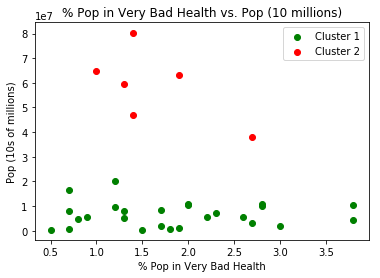

In [9]:
plt.scatter(cluster_1.iloc[:,12],cluster_1.iloc[:,13],c="green",label="Cluster 1")
plt.scatter(cluster_2.iloc[:,12],cluster_2.iloc[:,13],c="red",label="Cluster 2")
plt.xlabel('% Pop in Very Bad Health')
plt.ylabel('Pop (10s of millions)')
plt.title('% Pop in Very Bad Health vs. Pop (10 millions)')
plt.legend()
plt.show()

We see two distinct groups, which is good to see here. From our comparisons between Cluster 1 and 2 this is understandable as there is a large difference in population between the two clusters. We see countries in cluster 2 have a much higher population (but also greater variation in population) than cluster 1.

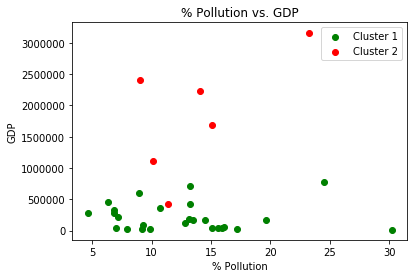

In [10]:
plt.scatter(cluster_1.iloc[:,3],cluster_1.iloc[:,7],c="green",label="Cluster 1")
plt.scatter(cluster_2.iloc[:,3],cluster_2.iloc[:,7],c="red",label="Cluster 2")
plt.xlabel('% Pollution')
plt.ylabel('GDP')
plt.title('% Pollution vs. GDP')
plt.legend()
plt.show()

A bit of overlap here, although still relatively distanced since GDP of Cluster 2 on average is greater than Cluster 1.

In terms of relevance, the difference in clusters are more distinct for some variables than others - besides GDP or population, the actual differences in countries is quite marginal. We see minor differences between clusters in metrics such as reported crime but larger differences when we look at population. Thus, these groupings should not discourage travelling to certain European countries, but rather to gain an understanding of different countries' characteristics. There are also other factors such as new events that may occur and shape these measurements differently over time, as well as immigration/visitation laws that might deter tourists from visiting certain coutnries.

Thanks for reading! Please let me know if you have any comments or suggestions.